In [6]:
# Objectives :: Our obective is to classify the persons who are survived after the surgery and from the persons who are dead after the surgery from haberman data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [17]:
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("C:/Users/asing053/haberman.csv")
haberman["Alive/Dead"] = np.where(haberman['Survived']<=1, 'Yes', 'No')
haberman
# Created a new column to understand better way the survived status,Yes->Person who is survived after the surgery & No->Person is dead after the surgery.


Age  Year_of_operation  Positive_nodes  Survived Alive/Dead
0     43                 58              52         2         No
1     54                 67              46         1        Yes
2     59                 62              35         2         No
3     34                 58              30         1        Yes
4     63                 61              28         1        Yes
..   ...                ...             ...       ...        ...
301   35                 63               0         1        Yes
302   34                 59               0         2         No
303   34                 60               0         1        Yes
304   33                 60               0         1        Yes
305   30                 65               0         1        Yes

[306 rows x 5 columns]

Added one attribute to make the data easy and to make visulisation easy and understandable to each individuals. Observation: survival status shows that most of the patients have survived the operation.

In [20]:
#Mainly it indicates the number of(rows, columns)
print(haberman.shape)


(306, 5)


#Column names in our dataset?
#It gives you columns name which have assigned and its type

In [21]:
print (haberman.columns)

Index(['Age', 'Year_of_operation', 'Positive_nodes', 'Survived', 'Alive/Dead'], dtype='object')


# We have two catogories in Survstatus:
# 1->Person who is survived after the surgery & 2->Person is dead after the surgery.



In [23]:
haberman["Survived"].value_counts()

1    225
2     81
Name: Survived, dtype: int64

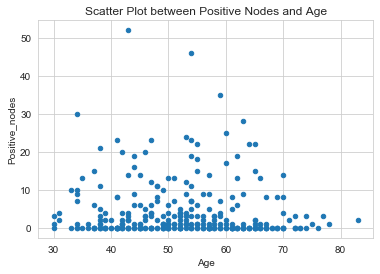

In [25]:
#2D Scatter Plot
haberman.plot(kind='scatter', x='Age', y='Positive_nodes', title='Scatter Plot between Positive Nodes and Age')
plt.show()

Observation:Scatter plot shows the higher nodes in range of age is between 35 to 60. we dont have any survived Legend in this plot to show any classification.

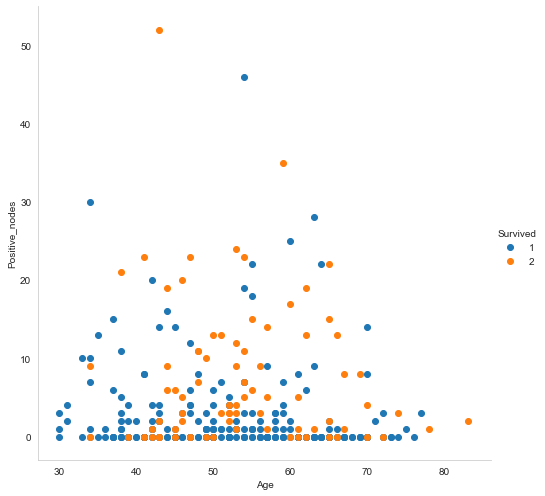

In [26]:
#2D Scatter plot with color-coding between Age and Positive Nodes.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survived", size=7) \
   .map(plt.scatter, "Age", "Positive_nodes") \
   .add_legend();
plt.grid();
plt.show();

#Objective: To find the discriptions of Nodes to relate with health condition. which may help to understand what will be the scenario when we are getting any nodes counts.
#Mean of status 1(Blue color): Patient will be alive after surgery completed.
#Mean of status 2(Orange color): Patient will be died after surgery completed.

#Observation: Can not classify since Survived 1 & 2 are fully overlapped.

In [27]:
#2D Scatter plot with color-coding between Year of Operations and Positive Nodes.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survived", size=7) \
   .map(plt.scatter, "Year_of_operation", "Positive_nodes") \
   .add_legend();
plt.grid();
plt.show();

#Observation: Can not classify since Survived 1 & 2 are fully overlapped.

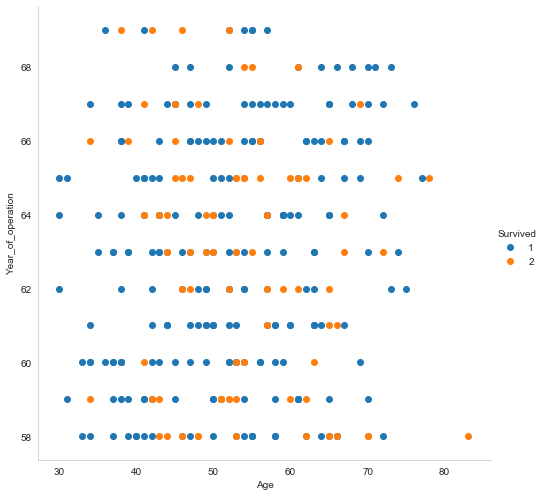

In [28]:
#2D Scatter plot with color-coding between Year of Operations and Age.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survived", size=7) \
   .map(plt.scatter, "Age", "Year_of_operation") \
   .add_legend();
plt.grid();
plt.show();

#Observation:As per below sample grap, Age <40 mostly noticed are Alive after the surgery, but rest of other samples Can not classify since Survived status 1 & 2 are fully overlapped.

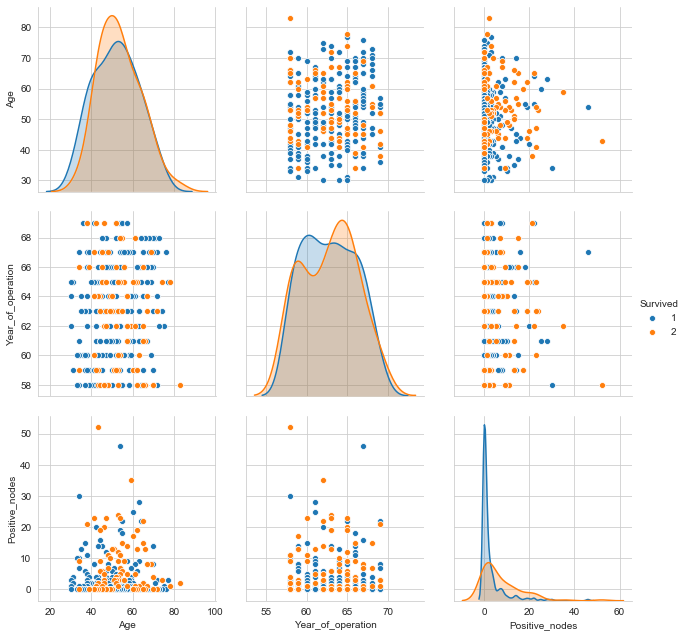

In [35]:
#pairwise scatter plot: Pair-Plot to veiw 2D patterns.

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survived", size=3,vars=["Age","Year_of_operation","Positive_nodes"]);
plt.show()



Observations: Not a single pair-plot can classify between 1 and 2 because everyone of them are overlapped, hense we will check visualization in PDF,CDF and other plots


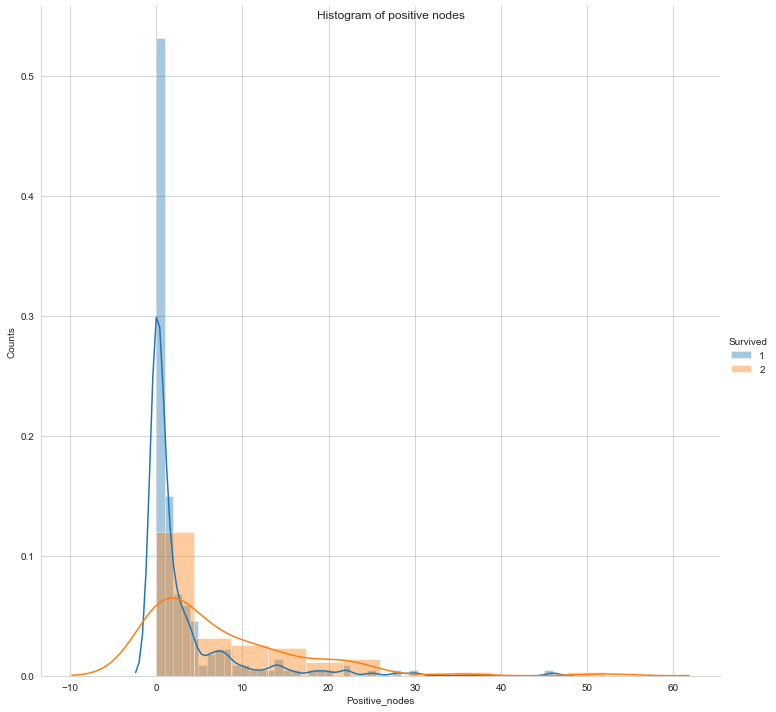

In [36]:
#Histogram, PDF, CDF
#1-D scatter plot of petal-length
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.FacetGrid(haberman, hue="Survived", size=10) \
   .map(sns.distplot, "Positive_nodes") \
   .add_legend().fig.suptitle('Histogram of positive nodes');
plt.ylabel("Counts")
plt.show();

Observation: Max no of patient survived who have Number of positive nodes less than five.

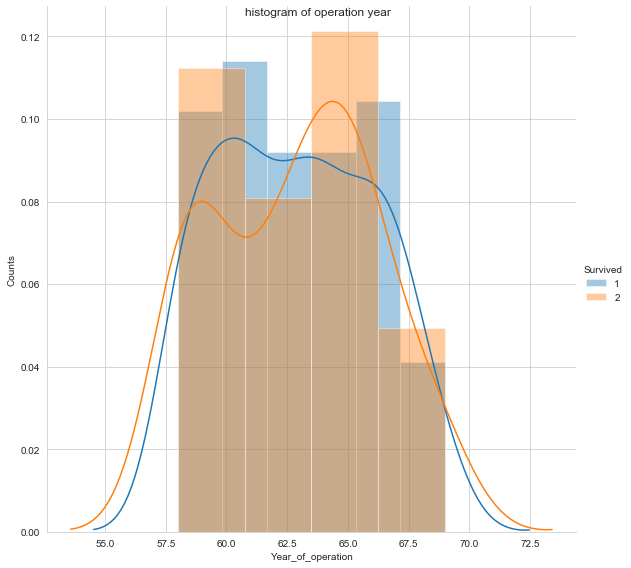

In [37]:
sns.FacetGrid(haberman, hue="Survived", size=8) \
   .map(sns.distplot, "Year_of_operation") \
   .add_legend().fig.suptitle('histogram of operation year');
plt.ylabel("Counts")
plt.show();

Observation: We can see the overlapping is more for survival status 1 than status 2 Most of the patients of status 1 has less no.of Nodes That may indicate a inverse relation between nodes and Survival Status


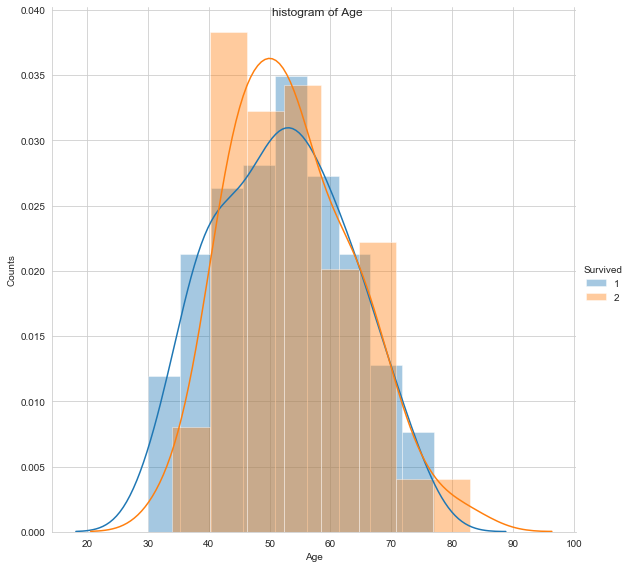

In [38]:
sns.FacetGrid(haberman, hue="Survived", size=8) \
   .map(sns.distplot, "Age") \
   .add_legend().fig.suptitle('histogram of Age');
plt.ylabel("Counts")
plt.show();

Observation: In this plot, does not classify with the Age

In [24]:
# CDF & PDF

alive = haberman.loc[haberman["Alive/Dead"]=="Yes"]
dead=haberman.loc[haberman["Alive/Dead"]=="No"]

counts, bin_edges = np.histogram(alive['Positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF alive');
plt.plot(bin_edges[1:], cdf,label='CDF alive');

counts, bin_edges = np.histogram(dead['Positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF dead');
plt.plot(bin_edges[1:], cdf,label='CDF dead');

plt.legend()    
plt.show();

PDF [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
PDF [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


Observation: 
=> when the nodes are between 10-30,the probability that a patient alive is lesser than dead. ie alive <dead when positive node is 10 to 30.

=> if Positive node is > 30 then alive and dead probability is same.

=> if axil node is < 10 then alive ratio is more than dead.

PDF [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
PDF [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


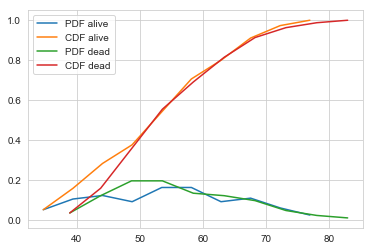

In [29]:
# CDF & PDF

alive = haberman.loc[haberman["Alive/Dead"]=="Yes"]
dead = haberman.loc[haberman["Alive/Dead"]=="No"]

counts, bin_edges = np.histogram(alive['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF alive');
plt.plot(bin_edges[1:], cdf,label='CDF alive');

counts, bin_edges = np.histogram(dead['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF dead');
plt.plot(bin_edges[1:], cdf,label='CDF dead');

plt.legend()    
plt.show();

Observation : When age is less than 60 alive rate is more when age is greater than 60 dead ratio is more than alive.

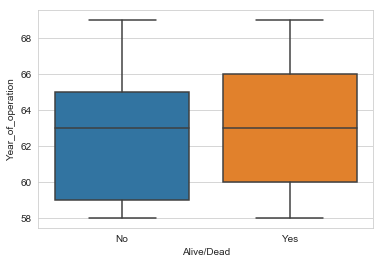

In [25]:
# Boxplot feature between Year of Operation and Positive Nodes for harberman data set.

sns.boxplot(x='Alive/Dead', y='Age', data=haberman)
plt.show()

sns.boxplot(x='Alive/Dead', y='Year_of_operation', data=haberman)
plt.show()

sns.boxplot(x='Alive/Dead', y='Positive_nodes', data=haberman)
plt.show()


Observation:
1 > In first box plot graph the Age whose Alive/Dead status is YES the 25th - 75th percentile value lies 42 to 60.And whose Alive/Dead status is NO the 25th-75th value lies from 46 to 62. 
2 > In 2nd box plot graph the Year of Operation whose Alive/Dead status is YES the 25th-75th percentile value lies 60 to 66. And whose Alive/Dead status is NO is 25th - 75th value lies from 59 to 65. 
3 > In third box plot the Positive_nodes whose Alive/Dead status is YES the 25th - 75th percentile value lies 0 to 4. And whose Alive/Dead status is NO is 25th-75th values lies from 1 to 11.


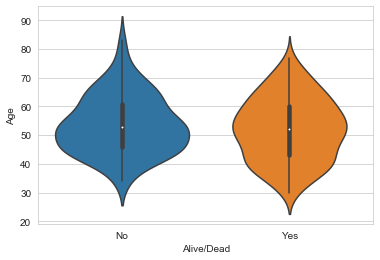

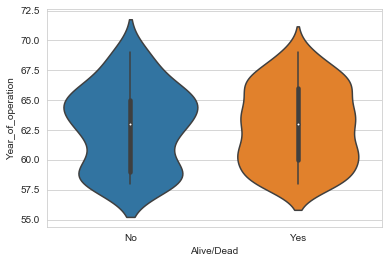

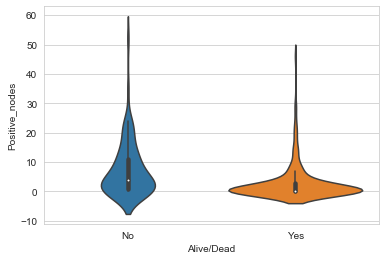

In [39]:
sns.violinplot(y='Age', x='Alive/Dead', data=haberman)
plt.show()

sns.violinplot(y='Year_of_operation', x='Alive/Dead', data=haberman)
plt.show()

sns.violinplot(y='Positive_nodes', x='Alive/Dead', data=haberman)
plt.show()

Observation: Since data is jambled and it does not gives much idea to classify.

In [40]:
#Mean, Variance and Std-dev
haberman.describe()

Age  Year_of_operation  Positive_nodes    Survived
count  306.000000         306.000000      306.000000  306.000000
mean    52.457516          62.852941        4.026144    1.264706
std     10.803452           3.249405        7.189654    0.441899
min     30.000000          58.000000        0.000000    1.000000
25%     44.000000          60.000000        0.000000    1.000000
50%     52.000000          63.000000        1.000000    1.000000
75%     60.750000          65.750000        4.000000    2.000000
max     83.000000          69.000000       52.000000    2.000000

Observation: From PDF,Box plot and Means of no.of axillary nodes, It is evident that if there are more no.of positive nodes the patient may tend to die with in 5 years of operation.